In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os


In [2]:

def load_data():
    df = pd.read_csv("data/revenue_summary.csv", parse_dates=["date"])
    df = df[["date", "occupancy"]].rename(columns={"date": "ds", "occupancy": "y"})
    return df



In [3]:
df=load_data()
df.head()

,ds,y
0,2022-01-01,0.79
1,2022-01-02,0.75
2,2022-01-03,0.86
3,2022-01-04,0.62
4,2022-01-05,0.58


In [4]:
def train_model(df):
    model = Prophet(weekly_seasonality=True)
    model.fit(df)
    return model



In [5]:
model=train_model(df)

22:35:39 - cmdstanpy - INFO - Chain [1] start processing
22:35:39 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
def forecast_occupancy(model, periods=90):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast



In [7]:
forecast=forecast_occupancy(model, periods=90)

In [8]:
def plot_forecast(model, forecast):
    fig = model.plot(forecast)
    plt.title("Occupancy Forecast")
    plt.tight_layout()
    os.makedirs("outputs", exist_ok=True)
    plt.savefig("outputs/occupancy_forecast.png")
    plt.show()


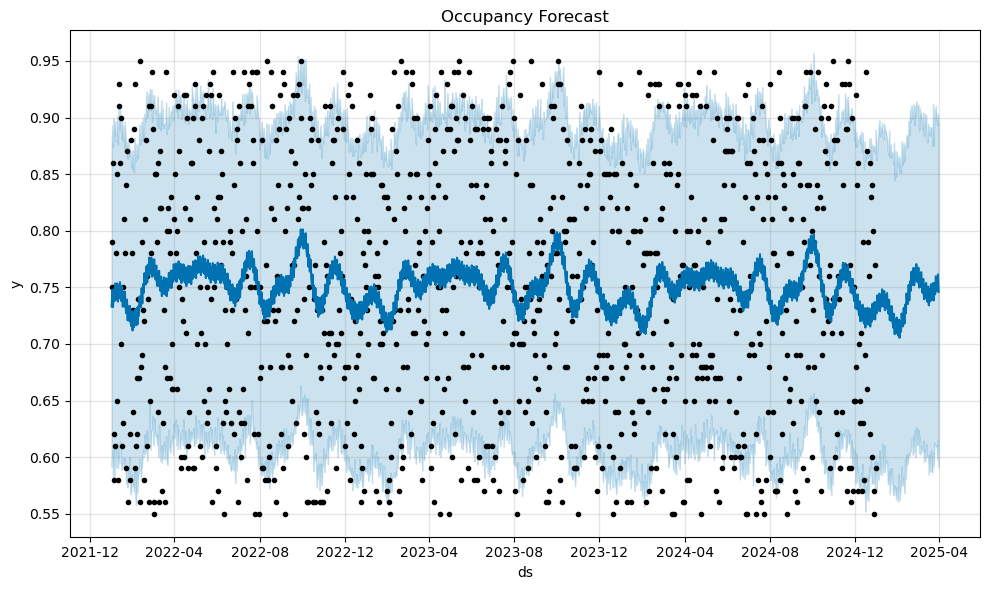

In [9]:
forecast_plot=plot_forecast(model, forecast)

In [10]:

def save_forecast(forecast):
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("outputs/occupancy_forecast.csv", index=False)



In [11]:
forecast=save_forecast(forecast)

In [12]:
def main():
    df = load_data()
    model = train_model(df)
    forecast = forecast_occupancy(model)
    plot_forecast(model, forecast)
    save_forecast(forecast)
    print("✅ Occupancy Forecast complete.")


22:35:41 - cmdstanpy - INFO - Chain [1] start processing
22:35:41 - cmdstanpy - INFO - Chain [1] done processing


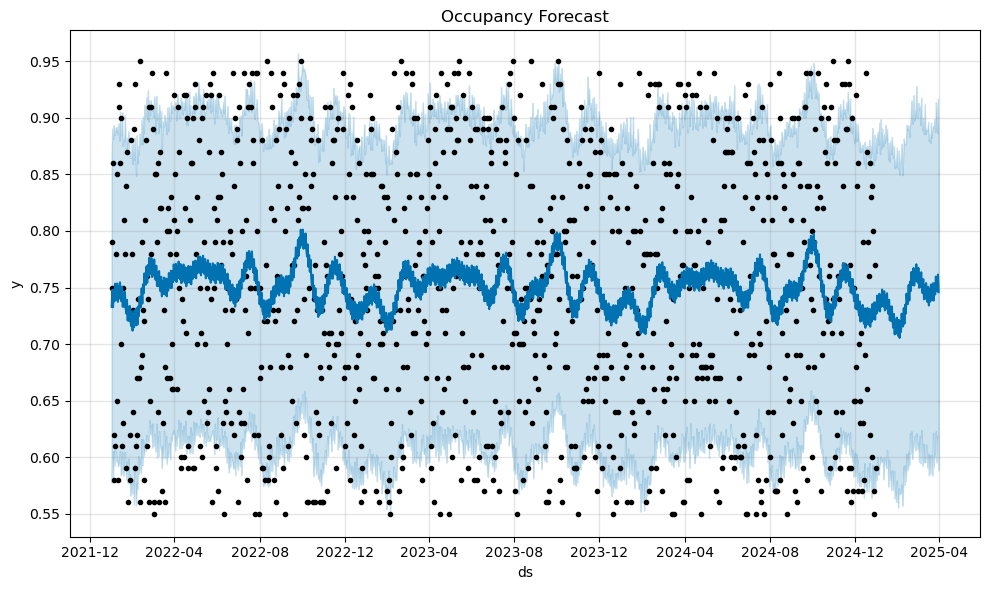

✅ Occupancy Forecast complete.


In [13]:

if __name__ == "__main__":
    main()